Однак из ключевых проблем Python - обеспечение точных вычислений при работе с числами с плавающей запятой.

In [ ]:
0.1 + 0.1 + 0.1

0.30000000000000004

In [ ]:
0.3 == 0.1 + 0.1 + 0.1

False

Во-вторых, нужно отметить, что одна из важных задач языка обеспечить сложные математические вычисления. При этом, это возможно, только при условии, что будет сохраняться исхоная математическая конструкция без вычислений до самого "конца". То есть язык должен работать с символьными вычсилениями.

Для символьных выичслений подходит модуль - SymPy.

# SymPy

## Базовый SymPy

In [ ]:
from sympy import *

Математические формулы sympy будут визуализируются с помощью MathJax и поэтому будут казаться нормальными.

Для работы с символьными переменными необходимо специальным образом их объявлять. Это можно делать с помощью метода `var`.

In [ ]:
var('a b c d')

(a, b, c, d)

Объявив переменные можно делать из них любые математические выражения.

In [ ]:
 e = (a + b)**2/(c-3)
 e

(a + b)**2/(c - 3)

Метод `subs` позволяет выполнять подстановки в существующие формулы. Для подстановки нескольких значений можно использовать словарь.

In [ ]:
e.subs(a, 5)

(b + 5)**2/(c - 3)

In [ ]:
e.subs({a: 5, b: -3})

4/(c - 3)

In [ ]:
e.subs({a: d-2, b: d*d})

(d**2 + d - 2)**2/(c - 3)

В SymPy удобно работать с многочленами.

In [ ]:
var('t')
q = t**3-3*t**2+4*t-7

In [ ]:
q

t**3 - 3*t**2 + 4*t - 7

In [ ]:
q**2

(t**3 - 3*t**2 + 4*t - 7)**2

In [ ]:
expand(q**2)

t**6 - 6*t**5 + 17*t**4 - 38*t**3 + 58*t**2 - 56*t + 49

In [ ]:
factor(t**3+1)

(t + 1)*(t**2 - t + 1)

## Решение уравнений

Естественно всё это нужно для того, чтобы, как было сказано ранее, проводить правильные математические вычисления. Например, решать уравнения.

In [ ]:
solveset(t**2 - 7*t + 6, t)

{1, 6}

In [ ]:
solveset(0, t, domain = S.Reals)

Reals

In [ ]:
solveset(t*t + 1, t)

{-I, I}

In [ ]:
solveset(a*t**2 + b*t + c, t)

{-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a), -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a)}

In [ ]:
var('u v')
linsolve([u - 5*v, 3*u + 2*v - 7], u, v)

{(35/17, 7/17)}

## Числа языка Python и числа в SymPy

Чтобы получить число в SymPy необходимо использовать метод `S`. Метод `N` используется для вычисления различных значений.

In [ ]:
S(2)/3+S(3)/3

5/3

In [ ]:
type(S(3))

sympy.core.numbers.Integer

In [ ]:
type(3)

int

In [ ]:
N(5/3, 5)

1.6667

In [ ]:
N(5/3, 50)

1.6666666666666667406815349750104360282421112060547

In [ ]:
N(S(5)/3, 50)

1.6666666666666666666666666666666666666666666666667

Здесь можно увидеть ключевую разницу в результах вычисления.

Посмотрим теперь "классический" пример.

In [ ]:
N(1/10+1/10+1/10, 50)

0.30000000000000004440892098500626161694526672363281

In [ ]:
N(S(1)/10+S(1)/10+S(1)/10, 50)

0.30000000000000000000000000000000000000000000000000

In [ ]:
N(S(0.1)+S(0.1)+S(0.1), 50)

0.30000000000000004440892098500626161694526672363281

## Графики
Модуль SymPy позволяет строить графики функций, которые заданы неявно или какими-то математическими выражениями, невычисляя никаких значений.

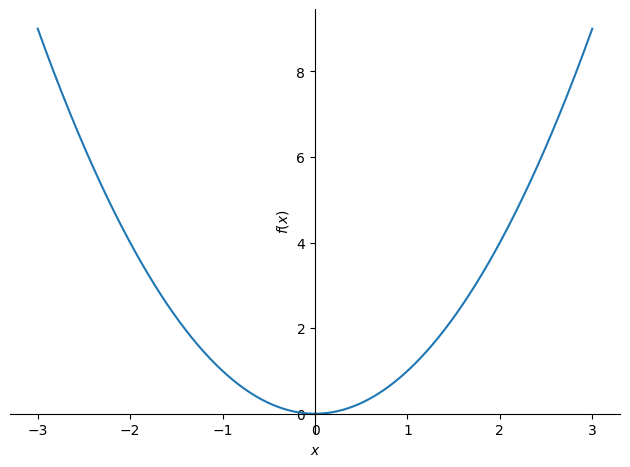

In [ ]:
var('x')
plot(x*x, (x, -3, 3))

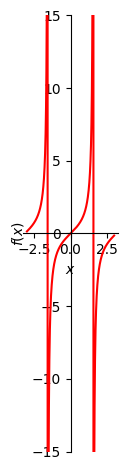

In [ ]:
p = plot(sin(x)/cos(x), (x,-3,3), ylim = (-15,15), line_color = 'r', aspect_ratio = (1,1))

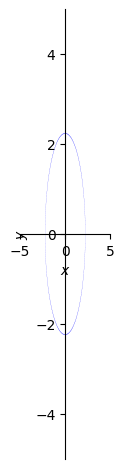

In [ ]:
var('y')
plot_implicit(x**2 + y**2 - 5, aspect_ratio = (1,5))

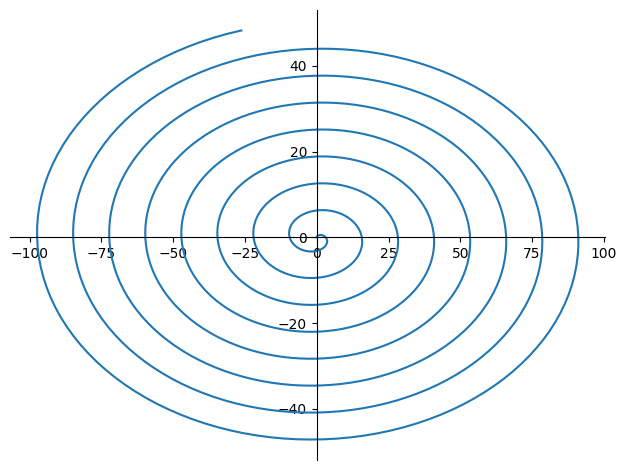

In [ ]:
plotting.plot_parametric(2*t*sin(t), t*cos(t), (t, 0, 50))

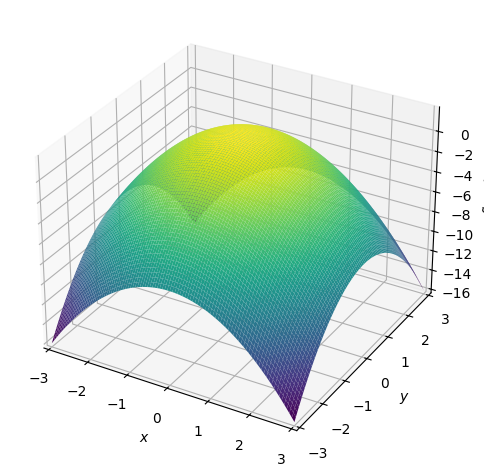

In [ ]:
plotting.plot3d(2 - x**2 - y**2, (x,-3,3), (y, -3, 3))

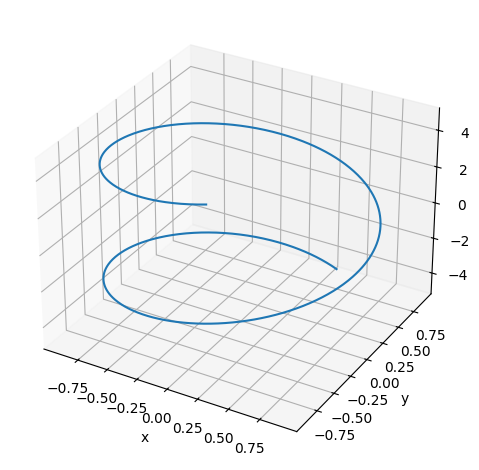

In [ ]:
from sympy.plotting import plot3d_parametric_line
plot3d_parametric_line(cos(x), sin(x), x, (x, -5, 5))

## Матрицы

In [ ]:
m1 = Matrix([[a,b],[c,d]])
m1

Matrix([
[a, b],
[c, d]])

In [ ]:
m2 = Matrix([[1,2],[3,4]])
m1 + 2*m2

Matrix([
[a + 2, b + 4],
[c + 6, d + 8]])

In [ ]:
m1.det()

a*d - b*c

In [ ]:
m1**(-1)

Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])

## Свойства функций

SimPy позволяет заглянуть не только в расчётную часть, но и проверить наличие или отсутствие различных свойств у функций.

In [ ]:
is_increasing(x**3 - 3*x**2 + 4*x, S.Reals)

True

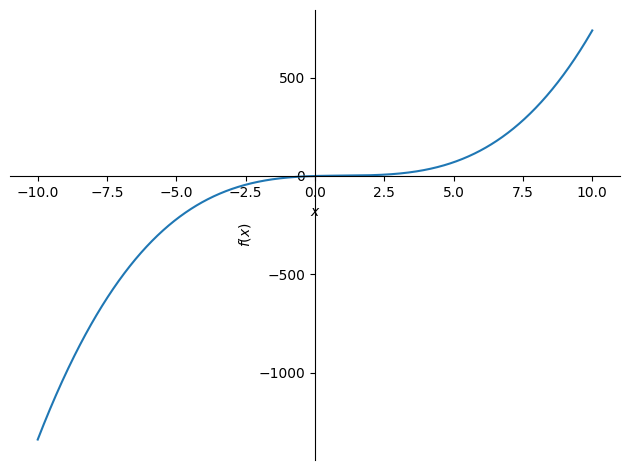

In [ ]:
plot(x**3 - 3*x**2 + 4*x, (x, -10, 10))

In [ ]:
is_increasing(-x**2, Interval(-oo, 0))

True

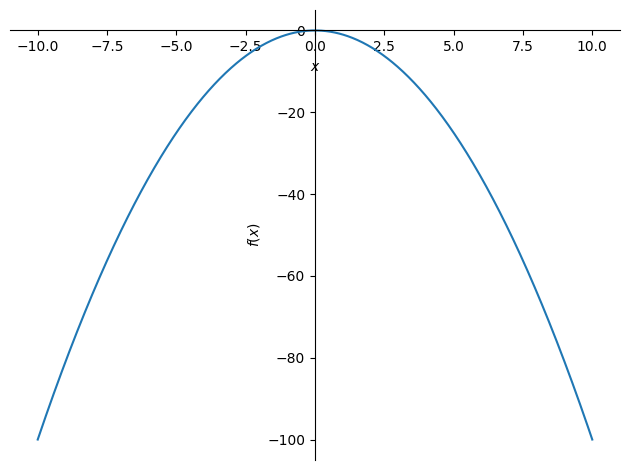

In [ ]:
plot(-x**2, (x, -10, 10))

In [ ]:
singularities(1/(y**3 + 1), y)

{-1, 1/2 - sqrt(3)*I/2, 1/2 + sqrt(3)*I/2}

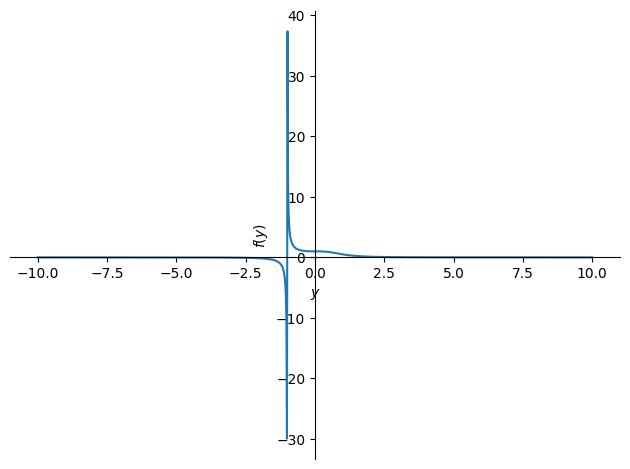

In [ ]:
plot(1/(y**3 + 1), (y, -10, 10))

In [ ]:
singularities(x**2 + x + 1, x)

EmptySet

In [ ]:
from sympy.calculus.util import *

In [ ]:
continuous_domain(1/x, x, S.Reals)

Union(Interval.open(-oo, 0), Interval.open(0, oo))

In [ ]:
minimum(sin(x)*cos(x), x)

-1/2

In [ ]:
periodicity(sin(x)*cos(x), x)

pi

## Пределы

In [ ]:
Limit(sin(x)/x, x, 0)

Limit(sin(x)/x, x, 0, dir='+')

In [ ]:
Limit(sin(x)/x, x, 0).doit()

1

In [ ]:
Limit(1/x, x, 0, '+').doit()

oo

In [ ]:
Limit((sin(x+t) - sin(x))/t, t, 0)

Limit((-sin(x) + sin(t + x))/t, t, 0, dir='+')

In [ ]:
Limit((sin(x+t) - sin(x))/t, t, 0).doit()

cos(x)

## Ряды

In [ ]:
var('p')

p

In [ ]:
s = Sum(1/p**2, (p, 1, oo))
s

Sum(p**(-2), (p, 1, oo))

In [ ]:
s.doit()

pi**2/6

In [ ]:
 sin(x).series(x,0,15)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 - x**11/39916800 + x**13/6227020800 + O(x**15)

## Дифференцирование

In [ ]:
f = exp(x)*sin(x) + cos(x)
f

exp(x)*sin(x) + cos(x)

In [ ]:
diff(f, x)

exp(x)*sin(x) + exp(x)*cos(x) - sin(x)

In [ ]:
diff(f, x, 2)

(2*exp(x) - 1)*cos(x)

In [ ]:
var('z')

z

In [ ]:
f = exp(x*y*z)

In [ ]:
f

exp(x*y*z)

In [ ]:
Derivative(f, x, y, 2, z, 4).doit()

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

## Интегрирование

In [ ]:
integrate(cos(x), x)

sin(x)

In [ ]:
integrate(exp(-x), (x, 0, oo))

1

In [ ]:
Integral(exp(-x), (x, 0, oo))

Integral(exp(-x), (x, 0, oo))

In [ ]:
F = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)

In [ ]:
F

Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)

In [ ]:
F.doit()

log(exp(x) + 1) + exp(x)/(x**2 - 1)

## Интерактивные интерфейсы

In [ ]:
import ipywidgets as widgets
from IPython.display import display

x, y = var('x y')

expr = x**2 + y**2

# Создаем виджеты для ввода значений x и y
x_widget = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='x')
y_widget = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='y')

# Функция для обновления вывода на основе введенных значений
def update(expr, x_val, y_val):
    result = expr.subs({x: x_val, y: y_val})
    display(Eq(expr, result))

# Создаем интерактивный интерфейс
interactive_output = widgets.interactive_output(update, {'expr': widgets.fixed(expr), 'x_val': x_widget, 'y_val': y_widget})

# Отображаем виджеты и вывод
display(x_widget, y_widget, interactive_output)

FloatSlider(value=0.0, description='x', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='y', max=10.0, min=-10.0)

Output()